[[7.7 8.7 10.5 12.6 15.9 19.8 22.0 22.2 20.3 16.3 11.8 8.7]
 [4.2 4.9 7.9 10.4 13.6 17.0 18.7 18.4 16.1 11.7 7.6 4.9]
 [4.6 5.4 8.9 11.3 14.5 17.2 19.5 19.4 16.9 12.5 8.1 5.3]
 [1.1 2.2 6.4 9.7 13.6 16.9 18.7 18.3 15.5 10.4 5.7 2.0]
 [7.6 8.0 10.8 12.0 14.7 17.8 19.7 19.9 18.5 14.8 10.9 8.2]
 [5.6 6.6 10.3 12.8 15.8 19.3 20.9 21.0 18.6 13.8 9.1 6.2]
 [6.1 5.8 7.8 9.2 11.6 14.4 15.6 16.0 14.7 12.0 9.0 7.0]
 [2.6 3.7 7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2 6.6 3.6]
 [1.3 2.6 6.9 10.4 14.3 17.7 19.6 19.0 15.9 10.5 5.7 2.1]
 [0.5 1.6 5.7 9.0 13.0 16.4 18.9 18.3 15.3 10.1 4.6 0.5]
 [1.5 3.2 7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4 6.5 2.3]
 [2.4 2.9 6.0 8.9 12.4 15.3 17.1 17.1 14.7 10.4 6.1 3.5]
 [3.1 3.9 7.4 9.9 13.3 16.8 18.4 17.8 15.3 10.7 6.7 3.8]
 [2.1 3.3 7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4 6.7 3.1]
 [5.5 6.6 10.0 13.0 16.8 20.8 23.3 22.8 19.9 15.0 10.2 6.9]
 [5.6 6.7 9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.0 6.5]
 [0.8 1.6 5.5 9.2 13.3 16.5 18.3 17.7 14.7 9.4 5.2 1.8]
 [5.0 5.3 8.4

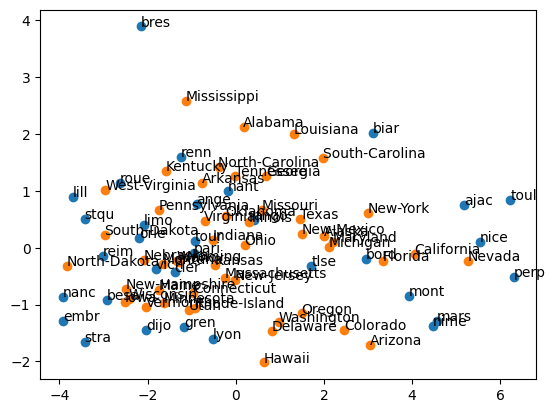

In [49]:
import matplotlib
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.decomposition import PCA
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from	sklearn	import	metrics

data = pd.read_csv('./villes.csv', sep=';')
nupy = np.array(data)
xVille = nupy[:, 1:13]
labelVille = nupy[:, 0]

# print(xVille)
# print(labelVille)

# Appliquer l'analyse en composantes principales (PCA) avec 12 composantes
pca = PCA(n_components=2, svd_solver='auto')
ssVille = StandardScaler().fit_transform(xVille)
xPcaVille = pca.fit_transform(ssVille)
# print(xPca)

varianceVille = pca.explained_variance_ratio_
axesVille = 0
for vari in varianceVille :
    axesVille += 1
    if vari >= 0.70 :
        print(f"Pour atteindre 70% d'informations, il faut {axesVille} axes.")
        break


plt.scatter(xPcaVille[:, 0], xPcaVille[:, 1])
for label, x, y in zip(labelVille, xPcaVille[:, 0], xPcaVille[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
# plt.show()

data_crime = pd.read_csv('./crimes.csv', sep=';')

np_data_crime = np.array(data_crime)
X_crime = np_data_crime[:, 1:7]
labels_crime = np_data_crime[:, 0]



scaler_crime = StandardScaler().fit_transform(X_crime)
pca_crime = PCA(n_components=6)
X_pca_crime = pca_crime.fit_transform(scaler_crime)

variances_crime = pca_crime.explained_variance_ratio_
compteur_axes_crime =  0

for variance in variances_crime:
    
    compteur_axes_crime += 1
    if variance >= 0.70:
        print(f"Pour crimes.csv, il faut {compteur_axes_crime} axes pour conserver au minimum 70% de l'information")
        exit


plt.scatter(X_pca_crime[:, 0], X_pca_crime[:, 1])
for label, x, y in zip(labels_crime, X_pca_crime[:, 0], X_pca_crime[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
# plt.show()




cluster 2 0.6181156437258204
cluster 3 0.40912000832289414
cluster 4 0.34071480805834065
cluster 5 0.33116954226736833
Meilleur score silhouette pour KMeans,  cluster : 2, score: 0.62


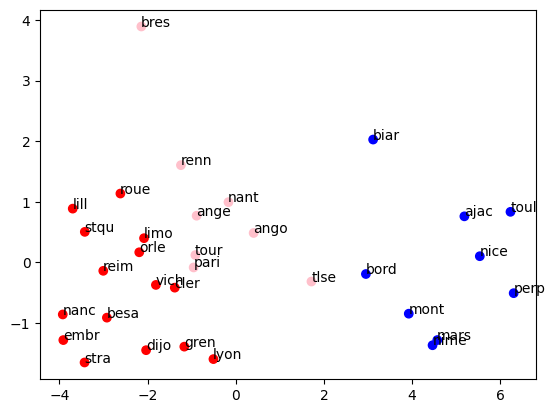

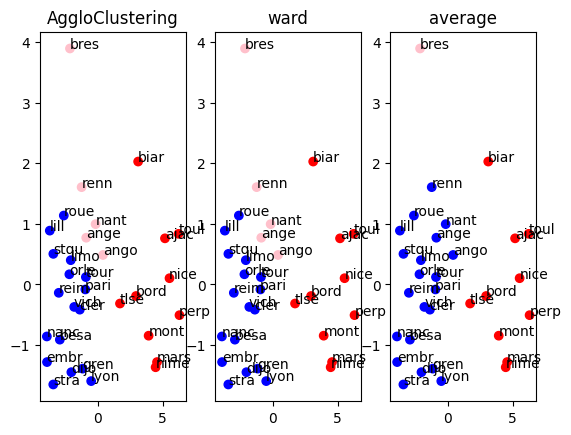

In [47]:
clustering = KMeans(n_clusters=3).fit_predict(xVille)

colors = [ 'red', 'yellow', 'blue', 'pink']
plt.scatter(xPcaVille[:, 0], xPcaVille[:, 1], c = clustering, cmap = matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labelVille, xPcaVille[:, 0], xPcaVille[:, 1]):
    plt.annotate(label, xy = (x, y), xytext = (-0.2, 0.2), textcoords = 'offset points')
# plt.show()


cluster_1 = AgglomerativeClustering(n_clusters=3).fit_predict(xVille)
cluster_2 = AgglomerativeClustering(n_clusters=3, linkage = "ward").fit_predict(xVille)
cluster_3 = AgglomerativeClustering(n_clusters=3, linkage = "average").fit_predict(xVille)

fig, axes = plt.subplots(1, 3)

axes[0].set_title('AggloClustering')
axes[1].set_title('ward')
axes[2].set_title('average')

axes[0].scatter(xPcaVille[:, 0], xPcaVille[:, 1], c = cluster_1, cmap = matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labelVille, xPcaVille[:, 0], xPcaVille[:, 1]):
    axes[0].annotate(label, xy = (x, y), xytext = (-0.2, 0.2), textcoords = 'offset points')

axes[1].scatter(xPcaVille[:, 0], xPcaVille[:, 1], c = cluster_2, cmap = matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labelVille, xPcaVille[:, 0], xPcaVille[:, 1]):
    axes[1].annotate(label, xy = (x, y), xytext = (-0.2, 0.2), textcoords = 'offset points')



axes[2].scatter(xPcaVille[:, 0], xPcaVille[:, 1], c = cluster_3, cmap = matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labelVille, xPcaVille[:, 0], xPcaVille[:, 1]):
    axes[2].annotate(label, xy = (x, y), xytext = (-0.2, 0.2), textcoords = 'offset points')
# plt.show()

for	i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(xVille)
    print(f"cluster {i}", metrics.silhouette_score(xVille,	clustering,metric='euclidean'))

clusters = [2, 3, 4, 5]
score = 0
cluster = 0
for i in clusters:
    clustering = KMeans(n_clusters=i).fit_predict(xVille)
    silh =  round(silhouette_score(xVille, clustering,metric='euclidean'), 2)
    if silh > score:
        score = silh
        cluster = i
print(f"Meilleur score silhouette pour KMeans,  cluster : {cluster}, score: {score}")